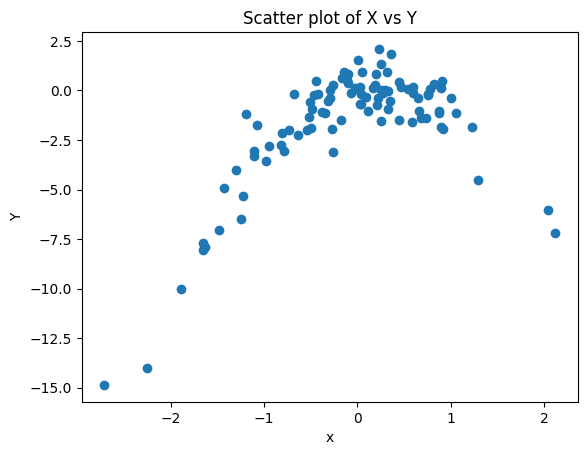

In [1]:
import numpy as np

# (a)設置隨機生成器
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)


###(b)plot

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

##從圖可以看出沒什麼線性關係


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

###(c) 設置隨機種子
np.random.seed(1)

# 構建四個模型並計算 LOOCV 誤差
loocv_errors = []
for degree in range(1, 5):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, x.reshape(-1, 1), y, cv=len(x), scoring='neg_mean_squared_error')
    loocv_error = -scores.mean()  # 取負值因為cross_val_score返回的是負MSE
    loocv_errors.append(loocv_error)
    print(f"Degree {degree} model LOOCV error: {loocv_error}")


Degree 1 model LOOCV error: 6.633029839181984
Degree 2 model LOOCV error: 1.122936856341969
Degree 3 model LOOCV error: 1.3017965489358863
Degree 4 model LOOCV error: 1.3323942694179336


In [ ]:
###(e)應該會比其他模型更適合這個數據集，因為這個模型的結構與數據的生成過程一致，因此能更好地解釋數據中的變異。相比之下，線性模型可能過於簡單，而三次和四次模型則可能會增加不必要的複雜度（過擬合），導致較高的 LOOCV 誤差。

In [3]:
###(f)
import statsmodels.api as sm

# 檢查每個模型的係數顯著性
for degree in range(1, 5):
    X_poly = PolynomialFeatures(degree).fit_transform(x.reshape(-1, 1))
    model = sm.OLS(y, X_poly).fit()
    print(f"\nDegree {degree} model summary:")
    print(model.summary())



Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.04e-09
Time:                        07:23:30   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      